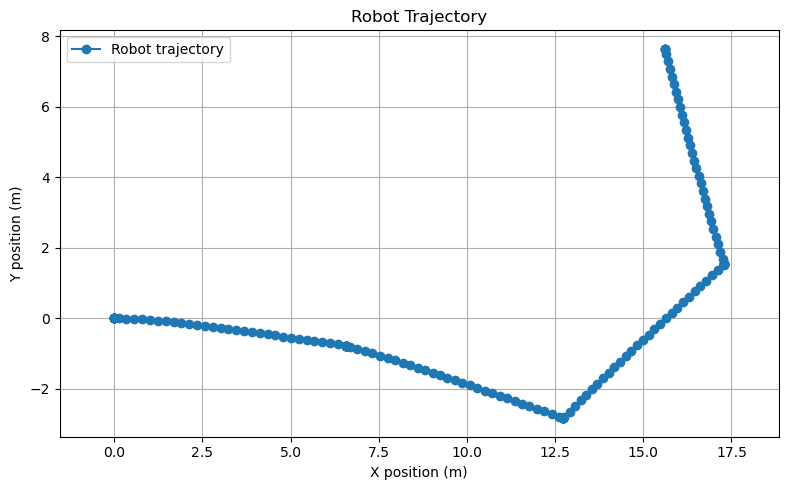

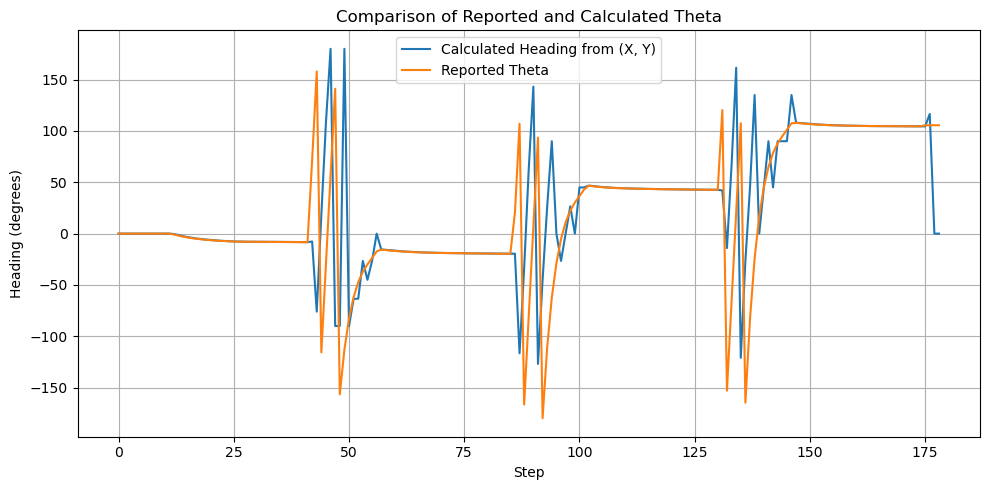

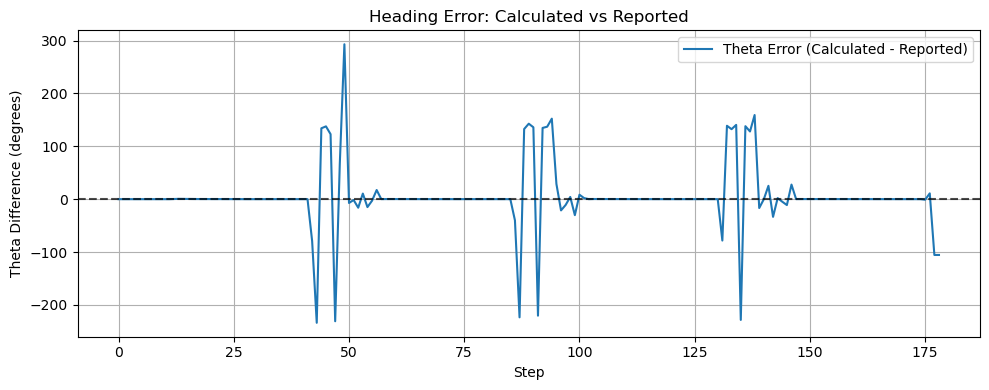

Mean difference (calculated - reported): 4.78 degrees
Std deviation of difference: 61.36 degrees


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv('controller_and_pose_log.csv')

# Drop rows where pose_x or pose_y is missing (i.e., NaN)
df_clean = df.dropna(subset=['pose_x', 'pose_y', 'pose_theta']).reset_index(drop=True)

# --- Trajectory Plot (X vs Y) ---
plt.figure(figsize=(8,5))
plt.plot(df_clean['pose_x'], df_clean['pose_y'], marker='o', linestyle='-', label='Robot trajectory')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Robot Trajectory')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Calculate Heading from X, Y ---
x = df_clean['pose_x'].values
y = df_clean['pose_y'].values

dx = np.diff(x)
dy = np.diff(y)
theta_calc = np.degrees(np.arctan2(dy, dx))  # Calculated heading in degrees

theta_reported = df_clean['pose_theta'].values[1:]  # Skip first because diff reduces length by 1

# --- Plot Comparison of Reported and Calculated Theta ---
plt.figure(figsize=(10,5))
plt.plot(theta_calc, label='Calculated Heading from (X, Y)')
plt.plot(theta_reported, label='Reported Theta')
plt.xlabel('Step')
plt.ylabel('Heading (degrees)')
plt.title('Comparison of Reported and Calculated Theta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Heading Error: Calculated - Reported ---
theta_diff = theta_calc - theta_reported

plt.figure(figsize=(10,4))
plt.plot(theta_diff, label='Theta Error (Calculated - Reported)')
plt.axhline(0, color='k', linestyle='--', alpha=0.7)
plt.xlabel('Step')
plt.ylabel('Theta Difference (degrees)')
plt.title('Heading Error: Calculated vs Reported')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Mean and Std Deviation of Difference ---
mean_diff = np.mean(theta_diff)
std_diff = np.std(theta_diff)
print(f"Mean difference (calculated - reported): {mean_diff:.2f} degrees")
print(f"Std deviation of difference: {std_diff:.2f} degrees")

